In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn import tree
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge, RidgeCV,Lasso
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold,LeaveOneOut, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error

In [4]:
# Read the data set and get a breif look at the values 
data = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")

nrows,ncols = data.shape
#data.describe()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()
ageMissing = data[['Age','SibSp','Parch']].values.reshape(nrows,3)
imp = IterativeImputer(max_iter = 10, random_state = 0)
imp.fit(ageMissing)
imputedAges = np.round(imp.transform(ageMissing),decimals = 0)
data[['Age','SibSp','Parch']] = imputedAges
data.head()
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.head()
dep = data[['Survived']]
ind = pd.get_dummies(data, columns = ['Embarked','Sex','Pclass']).drop(['Survived','Ticket','Cabin','Name'],axis = 1) # Encode the categorical features

In [7]:
dtc = DecisionTreeClassifier()
dtc_1 = dtc.fit(ind,dep)
dtc_1.score(ind,dep)
pred = dtc_1.predict(ind)
cfMat = confusion_matrix(dep,pred)
cfMat

array([[549,   0],
       [  0, 342]], dtype=int64)

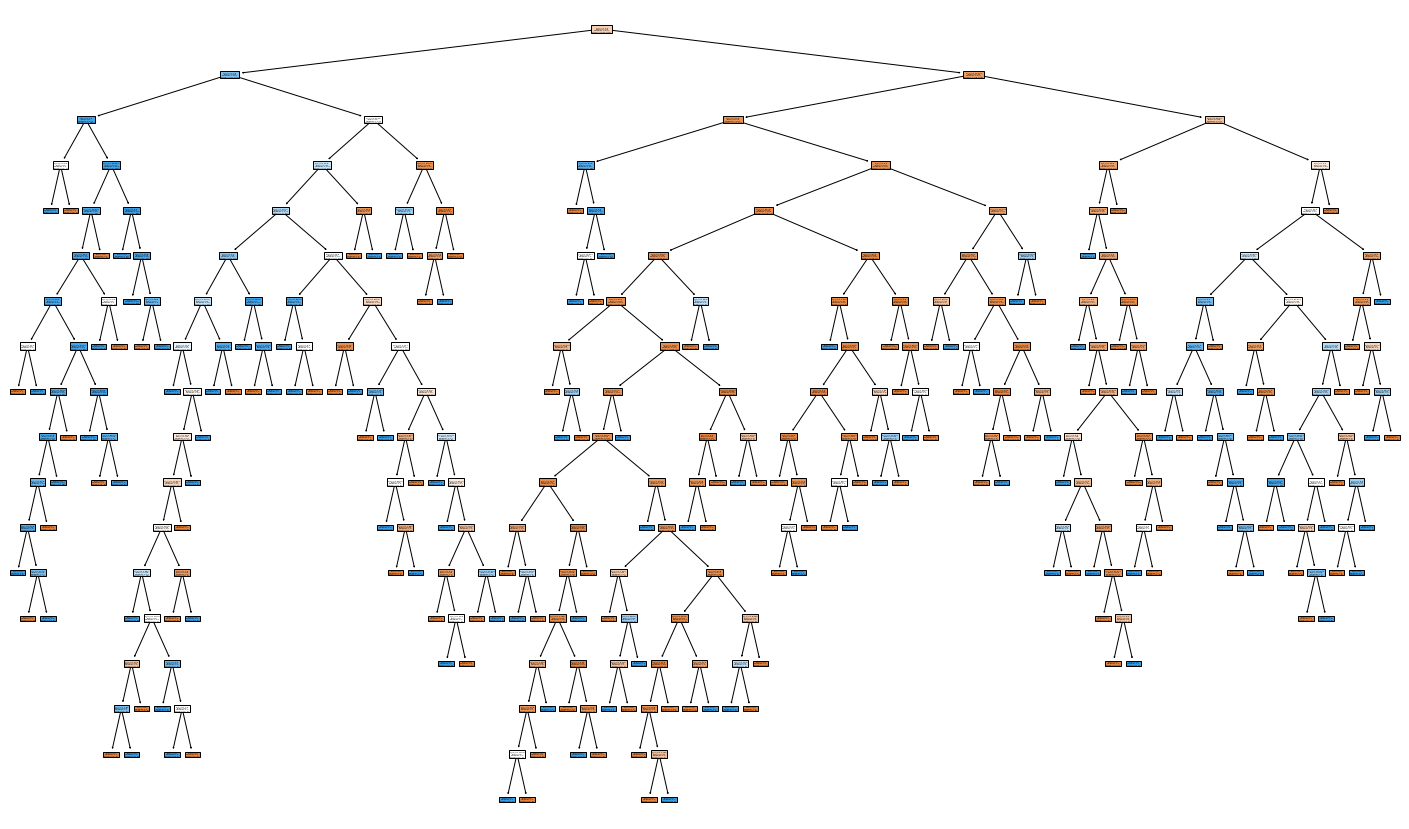

In [14]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(dtc_1, 
                   #feature_names=ind.feature_names,  
                   #class_names=dep.target_names,
                   filled=True)